In [1]:
import pickle
import os
import numpy as np
import random
import pickle
from google.colab import drive
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

/Users/sumaiyauddin/opt/anaconda3/envs/tensorflow_tf/lib/python3.9/site-packages/google/colab/data_table.py:30: UserWarning: IPython.utils.traitlets has moved to a top-level traitlets package.
  from IPython.utils import traitlets as _traitlets
2023-11-16 17:30:07.665465: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:


# Define the filenames for the pickle files
images = 'images.pkl'
labels = 'labels.pkl'
masks = 'masks.pkl'

# Load the images array from the pickle file
with open(images, 'rb') as file:
    images = pickle.load(file)

# Load the labels array from the pickle file
with open(labels, 'rb') as file:
    labels = pickle.load(file)

# Load the masks array from the pickle file
with open(masks, 'rb') as file:
    masks = pickle.load(file)
    
print(f"Images shape: {images.shape}")
print(f"Masks shape: {masks.shape}")
print(f"Labels shape: {labels.shape}")

Images shape: (113, 224, 224, 3)
Masks shape: (113, 224, 224)
Labels shape: (113,)


In [9]:
# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    brightness_range=[0.5, 1.5],
    fill_mode='nearest'
    #rescale=1.0 / 255  # Add normalization here
)

In [10]:
# Apply data augmentation to the training set
images_augmented = []
labels_augmented = []
masks_augmented = []

for i in range(images.shape[0]):
    img = images[i]
    label = labels[i]
    mask = masks[i]

    # Reshape mask to (224, 224, 1) for compatibility with ImageDataGenerator
    mask = np.expand_dims(mask, axis=-1)

    for j in range(5):
        # Apply the same augmentation to both image and mask
        augmented_data = datagen.random_transform(np.concatenate((img, mask), axis=-1))

        # Separate augmented image and mask
        x_augmented = augmented_data[:, :, :3]
        mask_augmented = augmented_data[:, :, 3]

        images_augmented.append(x_augmented)
        labels_augmented.append(label)
        masks_augmented.append(mask_augmented)

# Convert lists to arrays
images_augmented = np.array(images_augmented)
labels_augmented = np.array(labels_augmented)
masks_augmented = np.array(masks_augmented)

# Ensure mask values are in the range [0, 1]
masks_augmented = np.where(masks_augmented > 0.5, 1, 0)

In [11]:
images_augmented = np.array(images_augmented)
labels_augmented = np.array(labels_augmented)
masks_augmented = np.array(masks_augmented)

print(f"Images shape: {images_augmented.shape}")
print(f"Masks shape: {masks_augmented.shape}")
print(f"Labels shape: {labels_augmented.shape}")

Images shape: (565, 224, 224, 3)
Masks shape: (565, 224, 224)
Labels shape: (565,)


In [12]:
# # Concatenate the loaded data
# images2 = np.concatenate((images_augmented, images), axis=0)
# labels2 = np.concatenate((labels_augmented, labels), axis=0)
# masks2 = np.concatenate((masks_augmented, masks), axis=0)

# # Now, you have NumPy arrays for the resized images, masks, and labels
# print(f"Images shape: {images2.shape}")
# print(f"Masks shape: {masks2.shape}")
# print(f"Labels shape: {labels2.shape}")


In [13]:
# Define the filenames for the pickle files
augmented_images_pickle_file = 'augmented_apal_images.pickle'
augmented_labels_pickle_file = 'augmented_apal_labels.pickle'
augmented_masks_pickle_file = 'augmented_apal_masks.pickle'

# Save the augmented images to a pickle file
with open(augmented_images_pickle_file, 'wb') as file:
    pickle.dump(images_augmented, file)

# Save the augmented labels to a pickle file
with open(augmented_labels_pickle_file, 'wb') as file:
    pickle.dump(labels_augmented, file)

# Save the augmented masks to a pickle file
with open(augmented_masks_pickle_file, 'wb') as file:
    pickle.dump(masks_augmented, file)

## model comparison

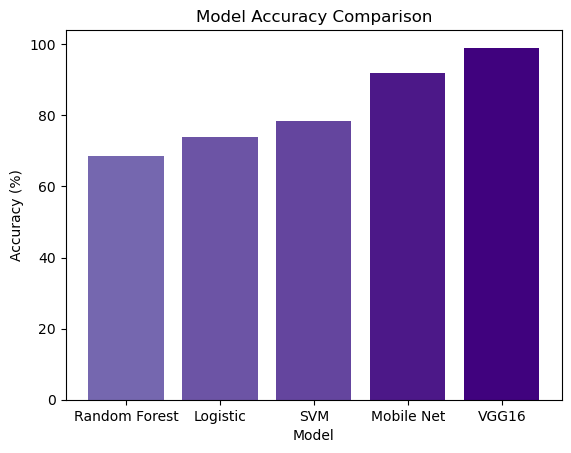

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define the model names and their corresponding percentages
models = ['Random Forest', 'Logistic', 'SVM', 'Mobile Net', 'VGG16']
percentages = [68.53, 73.85, 78.5, 92, 99]

# Create a NumPy array from the percentages
percentages_array = np.array(percentages)

# Set the colormap to 'Purples'
colormap = plt.get_cmap('Purples')

# Create a bar plot
plt.bar(models, percentages_array, color=colormap(percentages_array / 100))

# Add labels and a title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Show the plot
plt.show()


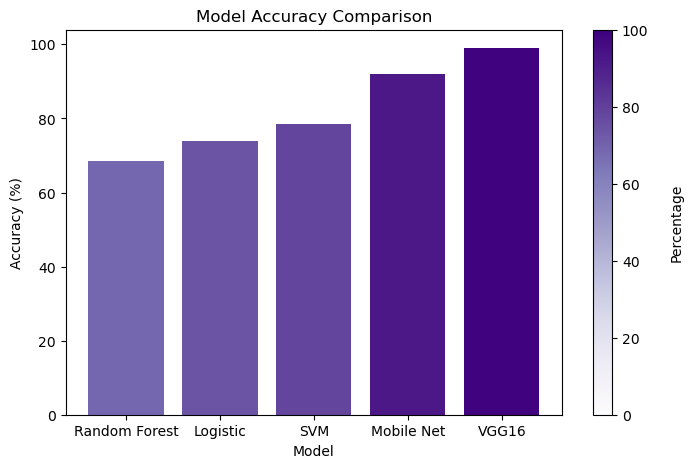

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Define the model names and their corresponding percentages
models = ['Random Forest', 'Logistic', 'SVM', 'Mobile Net', 'VGG16']
percentages = [68.53, 73.85, 78.5, 92, 99]

# Create a NumPy array from the percentages
percentages_array = np.array(percentages)

# Set the colormap to 'Purples'
colormap = plt.get_cmap('Purples')

# Set the figure size to 8x10 inches
plt.figure(figsize=(8, 5))

# Create a bar plot
bars = plt.bar(models, percentages_array, color=colormap(percentages_array / 100))

# Add labels and a title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Create a scalar mappable to display a color bar
sm = ScalarMappable(cmap=colormap, norm=plt.Normalize(0, 100))
sm.set_array([])  # Set the range of values for the color bar

# Add the color bar to the side of the plot
cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.05)
cbar.set_label('Percentage', rotation=90, labelpad=15)

# Show the plot
plt.show()


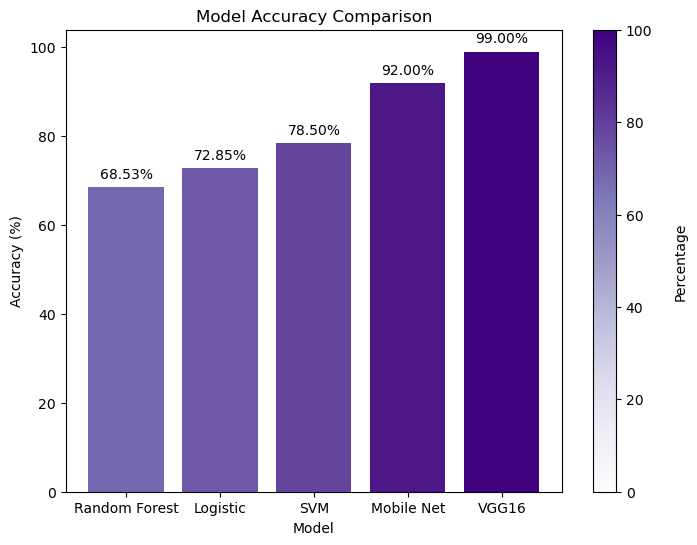

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

# Define the model names and their corresponding percentages
models = ['Random Forest', 'Logistic', 'SVM', 'Mobile Net', 'VGG16']
percentages = [68.53, 72.85, 78.5, 92, 99]

# Create a NumPy array from the percentages
percentages_array = np.array(percentages)

# Set the colormap to 'Purples'
colormap = plt.get_cmap('Purples')

# Set the figure size to 8x10 inches
plt.figure(figsize=(8, 6))

# Create a bar plot
bars = plt.bar(models, percentages_array, color=colormap(percentages_array / 100))

# Add labels and a title
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Create a scalar mappable to display a color bar
sm = ScalarMappable(cmap=colormap, norm=plt.Normalize(0, 100))
sm.set_array([])  # Set the range of values for the color bar

# Add the color bar to the side of the plot
cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.05)
cbar.set_label('Percentage', rotation=90, labelpad=15)

# Add percentage values on top of each bar
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f'{percentage:.2f}%', ha='center')

# Show the plot
plt.show()
